# Steven Granaturov Assignment 1 #
|       Model     | 2 Features (LS) | 2 Features (NLS) | 3 Features (LS) | 3 Features (NLS) | 4 Features (LS) | 4 Features (NLS) |
|-----------------|------------------|-----------------|------------------|-----------------|------------------|-----------------|
|    Perceptron   |       100%       |       76.7%     |       100%       |       86.7%     |       100%       |      16.7%      |
|    Adaline      |       100%       |       53.3%     |       100%       |       90.0%     |       76.7%      |      70.0%      |

- LS = Linearly Seperable
- NLS = Not Linearly Seperable

There are some discrepancies when it comes towards the results and I've tried my best to figure out why but I have been stumped. Specifically, why is it that the Perceptron is more accurate in classifying for the scenario of using 2 features, and the classes not being linearly seperable. The Perceptron is concerned with finding a solution, if exists, whereas the Adaline model is concerned with finding the best fit line regardless of the classes being linearly seperable or not. That should mean the adaline would have a higher confidence hence a higher accuracy compared to the Perceptron. The same occured with 4 features. Moreover, the Perceptron scored really poorly when it came to 4 features. It makes me feel that something was wrong with the code.


# 2 Features #

#### Imports ####


In [422]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Data Importation and Preparation ####


In [423]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url,
                 header=None,
                 encoding='utf-8')

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

#### Graphing the 3 species configurations of Sepal length vs. Petal length ####


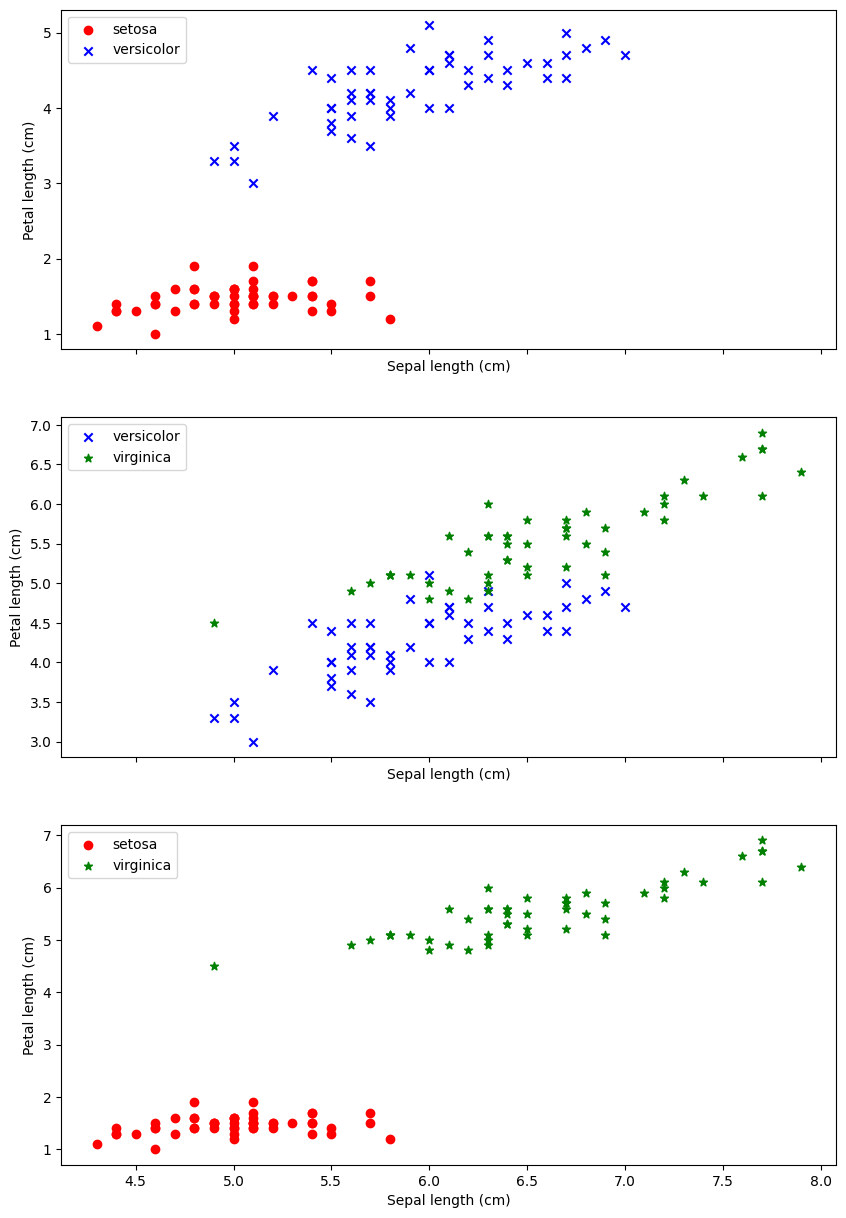

In [424]:
plt.close('all')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,15), sharex=True)

# Setosa & Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

ax[0].scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', label = 'setosa')
ax[0].scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker = 'x', label = 'versicolor')

ax[0].set_xlabel('Sepal length (cm)')
ax[0].set_ylabel('Petal length (cm)')
ax[0].legend(loc = 'upper left')

# ----------------------------------------------
# Versicolor & Virginica

y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values

ax[1].scatter(X[:50, 0], X[:50, 1],
            color = 'blue', marker = 'x', label = 'versicolor')
ax[1].scatter(X[50:100, 0], X[50:100, 1],
            color = 'green', marker = '*', label = 'virginica')

ax[1].set_xlabel('Sepal length (cm)')
ax[1].set_ylabel('Petal length (cm)')
ax[1].legend(loc = 'upper left')

# ----------------------------------------------
# Setosa & Virginica

y1 = df.iloc[0:50, 4].values
y2 = df.iloc[100:150, 4].values
x1 = df.iloc[0:50, [0, 2]].values
x2 = df.iloc[100:150, [0, 2]].values

ax[2].scatter(x1[:50, 0], x1[:50, 1],
            color = 'red', marker = 'o', label = 'setosa')
ax[2].scatter(x2[:50, 0], x2[:50, 1],
            color = 'green', marker = '*', label = 'virginica')

ax[2].set_xlabel('Sepal length (cm)')
ax[2].set_ylabel('Petal length (cm)')
ax[2].legend(loc = 'upper left')


## 2 Features - Linearly Seperable ##

#### Perceptron - Setosa & Versicolor (Sepal length vs petal length) ####


C:\Users\steve\AppData\Local\Temp\ipykernel_5280\956773515.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


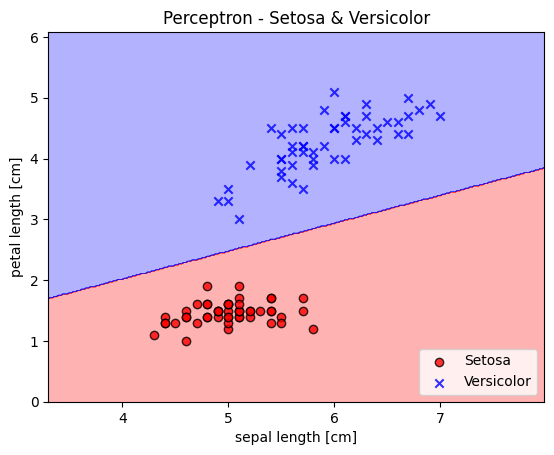

In [425]:
# Selecting X & y values from setosa & versicolor (sepal length vs petal length)
y_percep1 = df.iloc[0:100, 4].values
y_percep1 = np.where(y_percep1 == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X_percep1 = df.iloc[0:100, [0, 2]].values

# Creating Perceptron model
perceptron_model = Perceptron(eta0=0.1, max_iter=10)
perceptron_model.fit(X_percep1, y_percep1)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', '*')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X_percep1, y_percep1, classifier = perceptron_model)
plt.title('Perceptron - Setosa & Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

L = plt.legend(loc = 'lower right')
L.get_texts()[0].set_text("Setosa")
L.get_texts()[1].set_text("Versicolor")

plt.show()

#### Creation of Adaline Model - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [426]:
class Adaline(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

#### Determining an appropriate Learning Rate (.1? .01? .001? .0001?) ####
#### We want a decreasing graph - hence, the chosen learning curve is .0001 ####

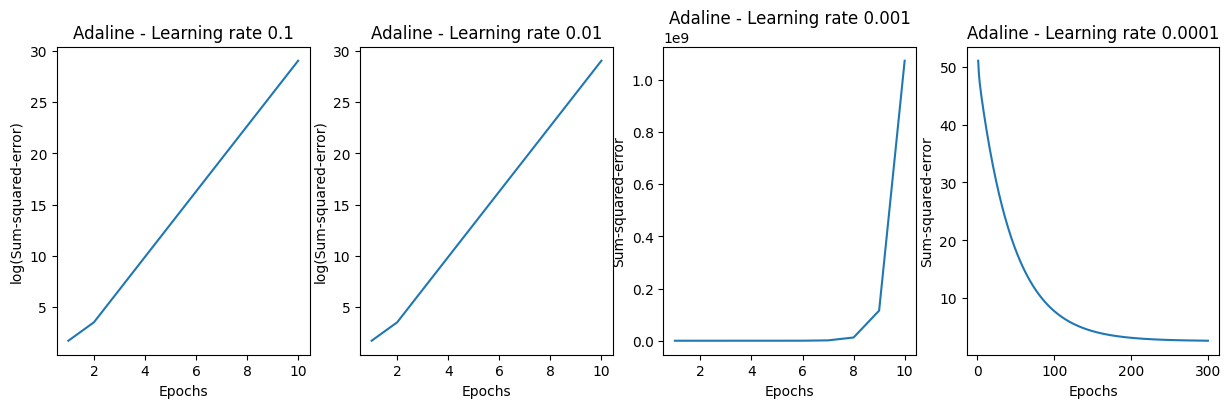

In [427]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

ada1 = Adaline(n_iter = 10, eta = 0.01).fit(X_percep1, y_percep1)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter = 10, eta = 0.01).fit(X_percep1, y_percep1)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.01')

ada3 = Adaline(n_iter = 10, eta = 0.001).fit(X_percep1, y_percep1)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.001')

ada4 = Adaline(n_iter = 300, eta = 0.0001).fit(X_percep1, y_percep1)
ax[3].plot(range(1, len(ada4.cost_) + 1), ada4.cost_)
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline - Learning rate 0.0001')

plt.show()

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [428]:
# standardize features
X_std = np.copy(X_percep1)
X_std[:, 0] = (X_percep1[:, 0] - X_percep1[:, 0].mean()) / X_percep1[:, 0].std()
X_std[:, 1] = (X_percep1[:, 1] - X_percep1[:, 1].mean()) / X_percep1[:, 1].std()

#### Adaline model for Setosa & Versicolor (sepal length vs. petal length) ####
#### Adaline graph and the Sum-Squared-Error graph ####



C:\Users\steve\AppData\Local\Temp\ipykernel_5280\956773515.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


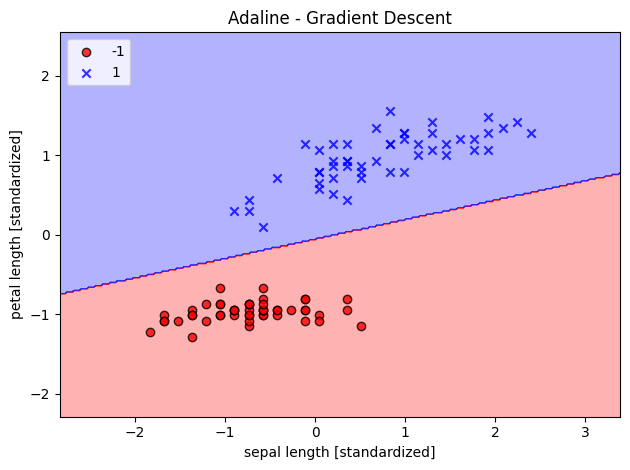

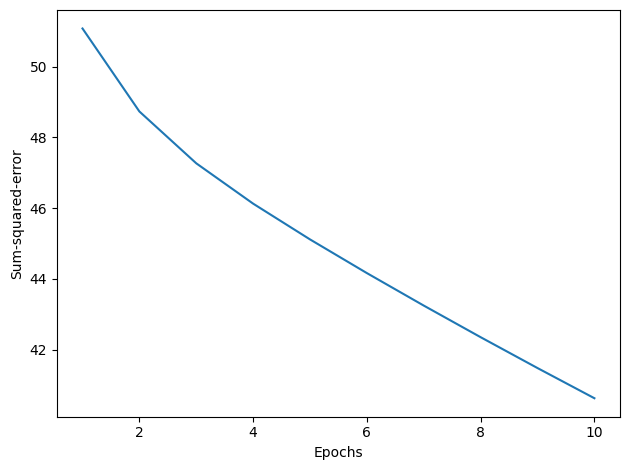

In [429]:
Adaline_1_Feature1 = Adaline(n_iter=10, eta=0.0001)
Adaline_1_Feature1.fit(X_percep1, y_percep1)

plot_decision_regions(X_std, y_percep1, classifier = Adaline_1_Feature1)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(Adaline_1_Feature1.cost_) + 1), Adaline_1_Feature1.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

#### Perceptron 2 - Setosa & Virginica (sepal length vs petal length) (Also Linearly Seperable) (Just playing around with graphs and models) ####

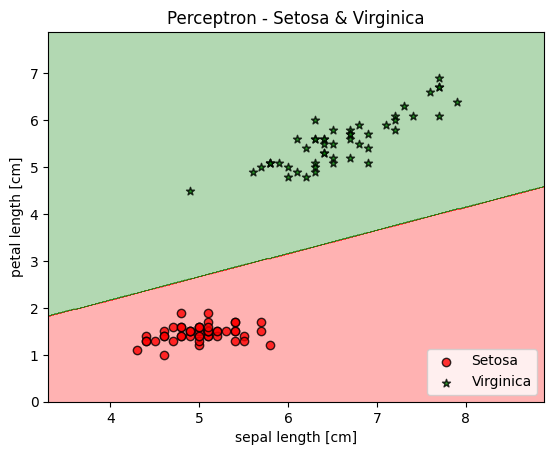

In [430]:
y1 = df.iloc[0:50, 4].values
y2 = df.iloc[100:150, 4].values
x1 = df.iloc[0:50, [0, 2]].values
x2 = df.iloc[100:150, [0, 2]].values

X = np.concatenate([x1, x2])
y = np.concatenate((y1, y2))


y = np.where(y == 'Iris-setosa', -1, 1)

# Creating Perceptron model
perceptron_model = Perceptron(eta0=0.1, max_iter=10)
perceptron_model.fit(X, y)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', '*')
    colors = ('red', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X, y, classifier=perceptron_model)
plt.title('Perceptron - Setosa & Virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

L = plt.legend(loc = 'lower right')
L.get_texts()[0].set_text("Setosa")
L.get_texts()[1].set_text("Virginica")

plt.show()

#### Determining an appropriate learning rate ####
#### Same as before, .0001 leads to a decreasing graph ####

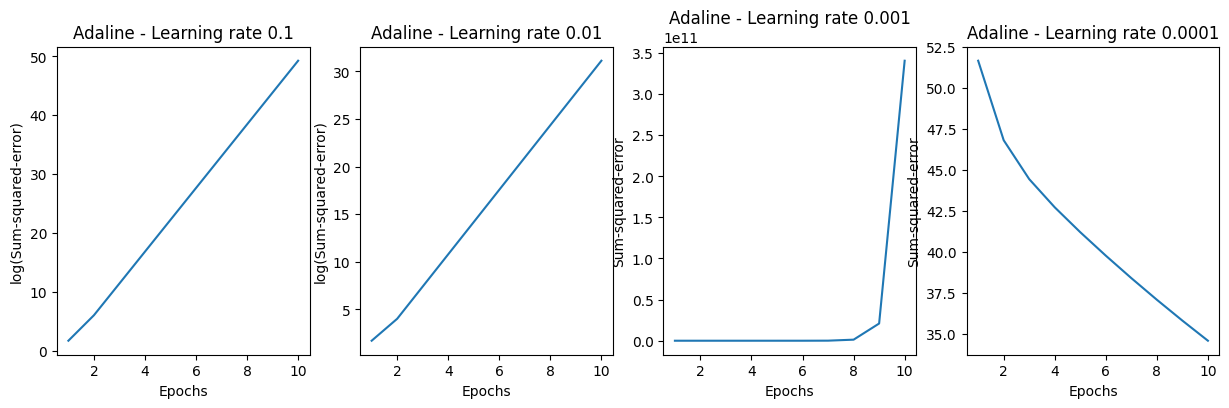

In [431]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

ada1 = Adaline(n_iter = 10, eta = 0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter = 10, eta = 0.01).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.01')

ada3 = Adaline(n_iter = 10, eta = 0.001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.001')

ada4 = Adaline(n_iter = 10, eta = 0.0001).fit(X, y)
ax[3].plot(range(1, len(ada4.cost_) + 1), ada4.cost_)
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline - Learning rate 0.0001')

plt.show()

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [432]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

#### Adaline model for Setosa & Virginica (sepal length vs. petal length) ####
#### Adaline graph and the Sum-Squared-Error graph ####



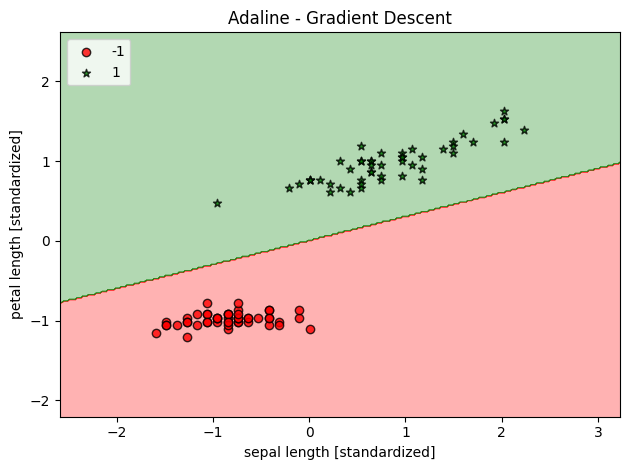

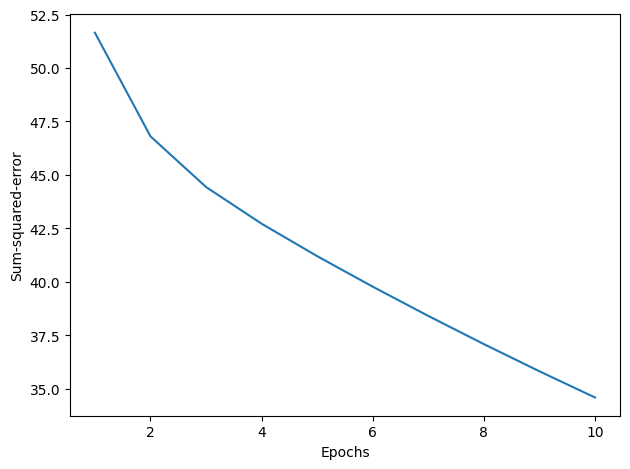

In [433]:
Adaline_1_Feature2 = Adaline(n_iter=10, eta=0.0001)
Adaline_1_Feature2.fit(X, y)

plot_decision_regions(X_std, y, classifier = Adaline_1_Feature2)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(Adaline_1_Feature2.cost_) + 1), Adaline_1_Feature2.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

## 2 Features - Not Linearly Seperable ##

#### Data Preparation ####

In [434]:
# Versicolor & Virginica

y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values

#### Perceptron model - 2 Features - Not Linearly Seperable ####

C:\Users\steve\AppData\Local\Temp\ipykernel_5280\3681622044.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


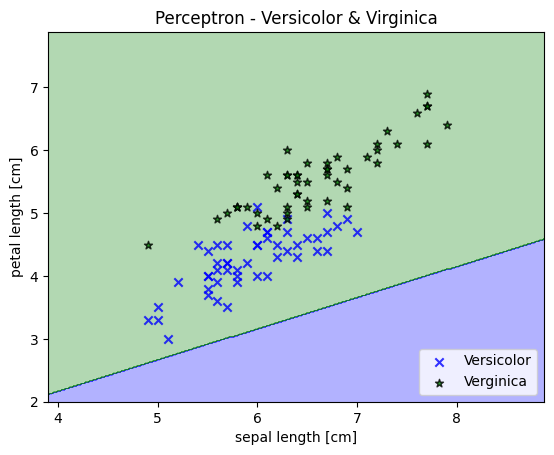

In [435]:
# Creating Perceptron model
perceptron_model_not_linear = Perceptron(eta0=0.1, max_iter=30)
perceptron_model_not_linear.fit(X, y)

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('x', '*')
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X, y, classifier = perceptron_model)
plt.title('Perceptron - Versicolor & Virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

L = plt.legend(loc = 'lower right')
L.get_texts()[0].set_text("Versicolor")
L.get_texts()[1].set_text("Verginica")

plt.show()

#### Perceptron Score ####

In [436]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

y_pred = perceptron_model_not_linear.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.7666666666666667


#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [437]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

#### Adaline Model - 2 Features - Not Linearly Seperable ####

C:\Users\steve\AppData\Local\Temp\ipykernel_5280\3681622044.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


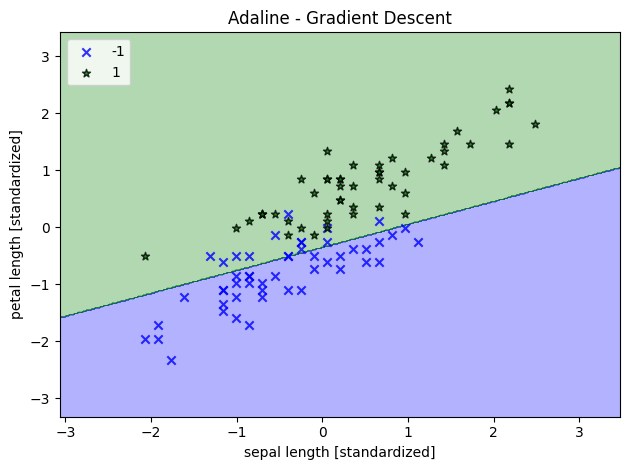

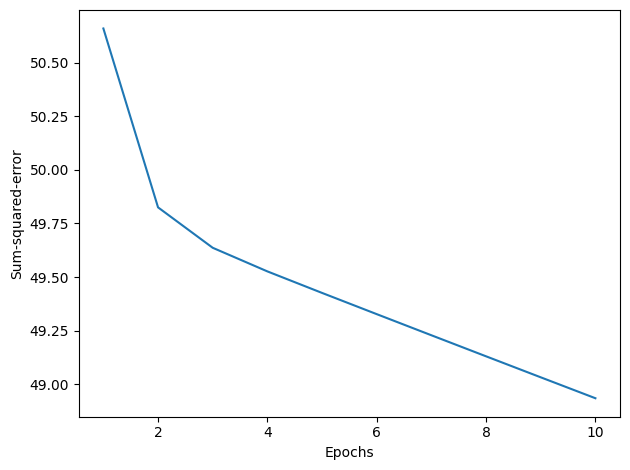

In [438]:
Adaline_1_not_linear = Adaline(n_iter=10, eta=0.0001)
Adaline_1_not_linear.fit(X, y)

plot_decision_regions(X_std, y, classifier = Adaline_1_not_linear)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(Adaline_1_not_linear.cost_) + 1), Adaline_1_not_linear.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

#### Adaline Accuracy ####

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

y_pred = Adaline_1_not_linear.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.5333333333333333


# 3 Features #

#### Data preparation ####

In [440]:
# Reset X & y values
iris = datasets.load_iris()
IC = np.unique(y)

X = iris.data
y = iris.target

#### 3D Graphs showing the numerous combinations of Setosa and Virginica using different classes ####

petal length (cm)
petal width (cm)
petal width (cm)
petal width (cm)
petal length (cm)
petal width (cm)
petal width (cm)
petal width (cm)
petal length (cm)
petal width (cm)
petal width (cm)
petal width (cm)


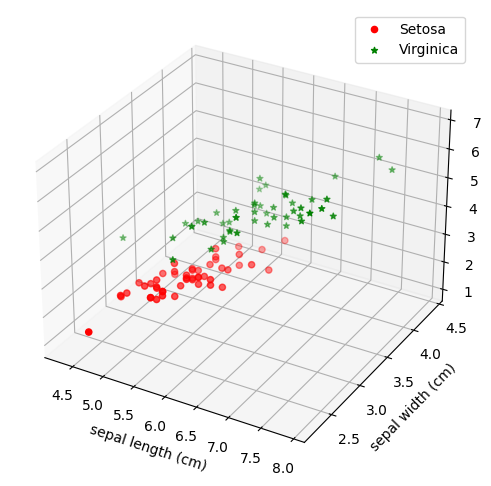

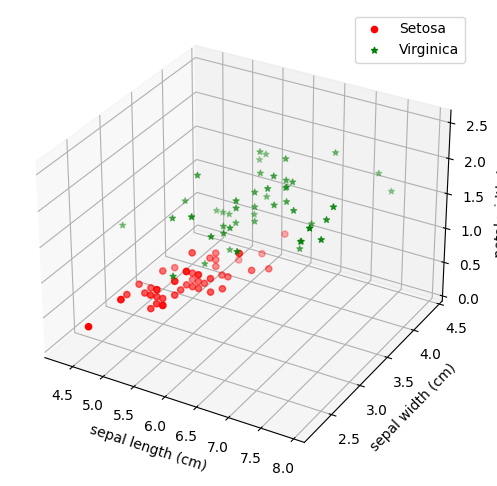

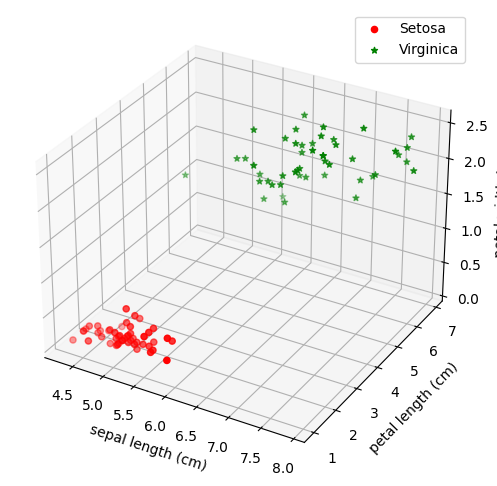

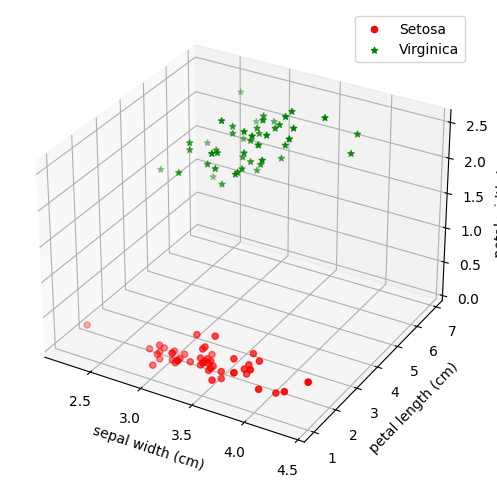

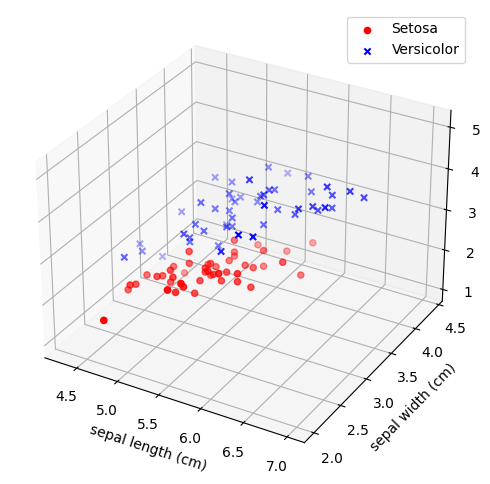

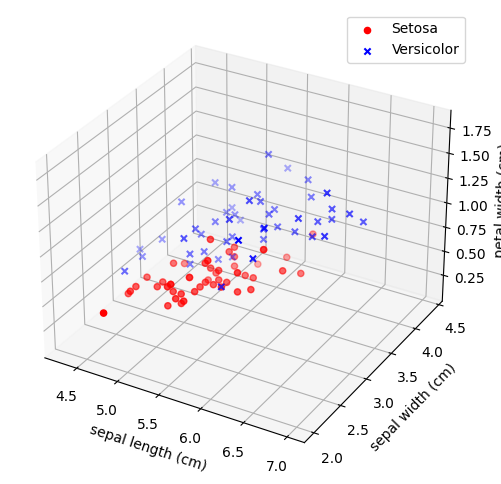

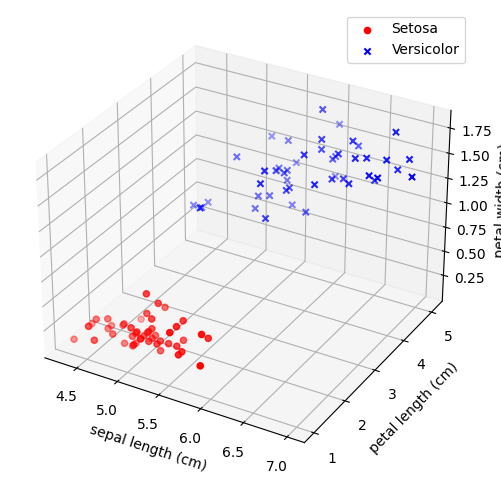

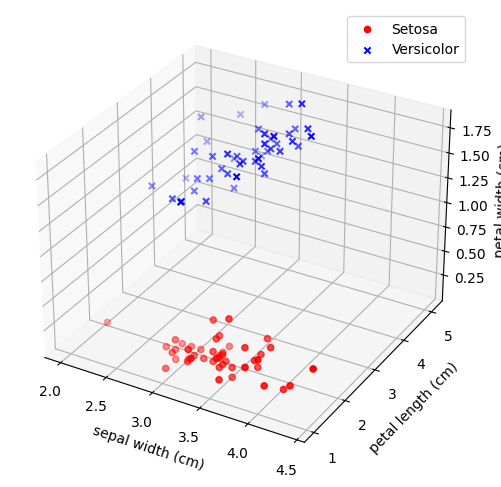

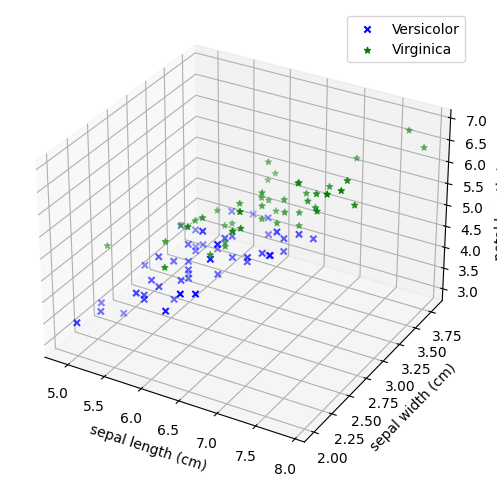

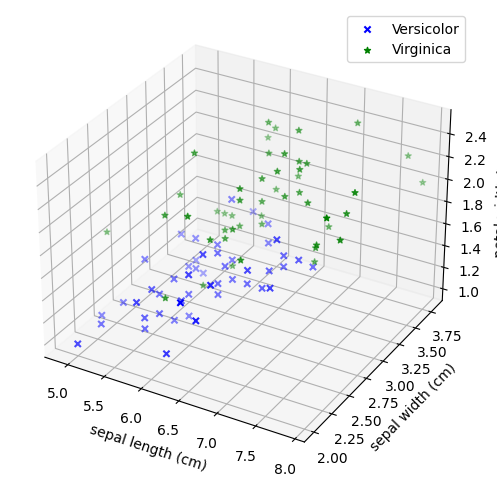

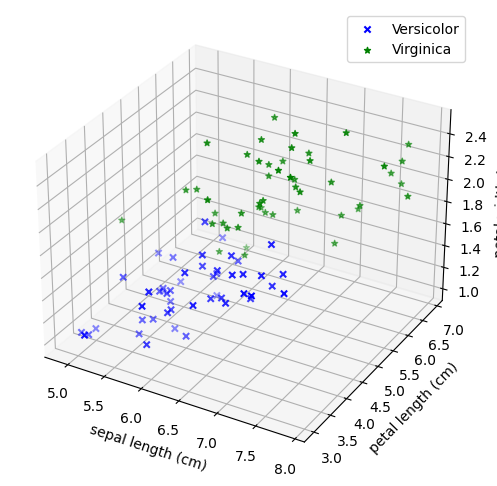

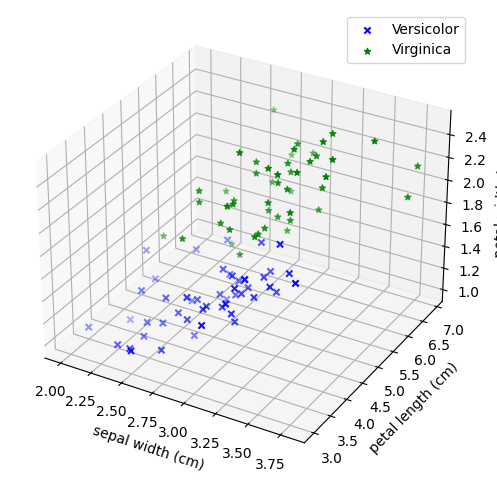

In [441]:
plt.close('all')

iris = datasets.load_iris()

X = iris.data
y = iris.target

IC = np.unique(y)

IrisClassification = ('Setosa', 'Versicolor', 'Virginica')
pltColor = ('red', 'blue', 'green')
IrisFeatures=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisFeatures[ixm]
    yF = IrisFeatures[iym]
    zF = IrisFeatures[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[y == IC[0],ixm], X[y == IC[0],iym], X[y == IC[0],izm], 
        color=pltColor[0], marker = 'o', label=IrisClassification[0])
    ax.scatter3D(X[y == IC[2],ixm], X[y == IC[2],iym], X[y == IC[2],izm], 
        color=pltColor[2], marker = '*', label=IrisClassification[2])

    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)
    print(zF)            
    ax.legend(loc='upper right', fontsize='medium')

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisFeatures[ixm]
    yF = IrisFeatures[iym]
    zF = IrisFeatures[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[y == IC[0],ixm], X[y == IC[0],iym], X[y == IC[0],izm], 
        color=pltColor[0], marker = 'o', label=IrisClassification[0])
    ax.scatter3D(X[y == IC[1],ixm], X[y == IC[1],iym], X[y == IC[1],izm], 
        color=pltColor[1], marker = 'x', label=IrisClassification[1])

    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)
    print(zF)            
    ax.legend(loc='upper right', fontsize='medium')

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisFeatures[ixm]
    yF = IrisFeatures[iym]
    zF = IrisFeatures[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[y == IC[1],ixm], X[y == IC[1],iym], X[y == IC[1],izm], 
        color=pltColor[1], marker = 'x', label=IrisClassification[1])
    ax.scatter3D(X[y == IC[2],ixm], X[y == IC[2],iym], X[y == IC[2],izm], 
        color=pltColor[2], marker = '*', label=IrisClassification[2])

    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)
    print(zF)            
    ax.legend(loc='upper right', fontsize='medium')

## Linearly Seperable ##

#### More data preparation ####

In [442]:
# Setosa & Virginica (sepal length, petal length, petal width)
y1 = df.iloc[0:50, 4].values
y2 = df.iloc[100:150, 4].values
x1 = df.iloc[0:50, [1, 2, 3]].values
x2 = df.iloc[100:150, [1, 2, 3]].values

X = np.concatenate([x1, x2])
y = np.concatenate((y1, y2))

y = np.where(y == 'Iris-setosa', -1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [443]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Perceptron - 3 Features (Sepal width, Petal Length, Petal Width) Versicolor vs. Virginica

In [444]:
from sklearn.metrics import accuracy_score
Perceptron_3_Features1 = Perceptron(max_iter = 100, tol = .0001, n_jobs = -1, random_state = 1)

Perceptron_3_Features1.fit(X_train_std, y_train)

y_pred = Perceptron_3_Features1.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  1.0


#### Adaline - 3 Features ####

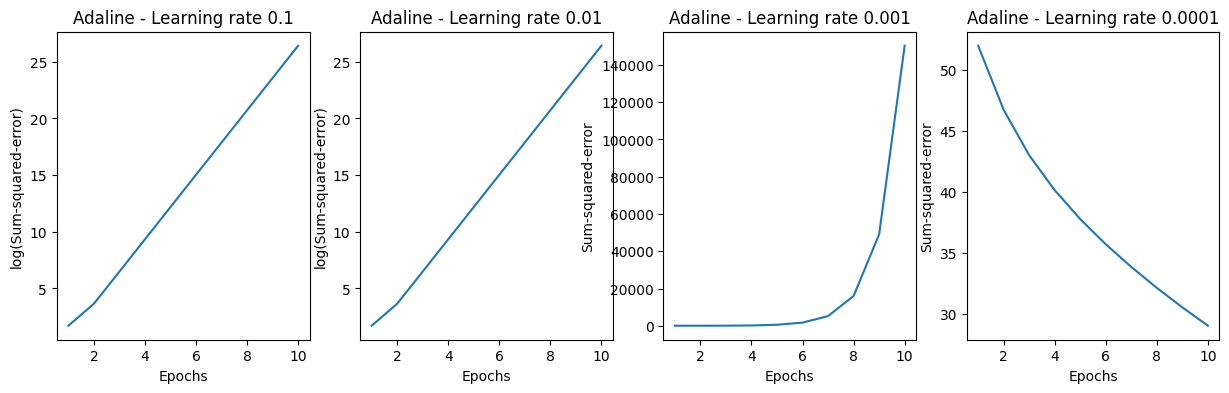

In [445]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

ada1 = Adaline(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter = 10, eta = 0.01).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.01')

ada3 = Adaline(n_iter = 10, eta = 0.001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.001')

ada4 = Adaline(n_iter = 10, eta = 0.0001).fit(X, y)
ax[3].plot(range(1, len(ada4.cost_) + 1), ada4.cost_)
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Adaline_3_Features_linear = Adaline()
Adaline_3_Features_linear.fit(X_train_std, y_train)

y_pred = Adaline_3_Features_linear.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))


Accuracy score:  1.0


## Not Linearly Seperable ##

In [447]:
# Versicolor & Virginica (sepal length, sepal width, petal width)

X = df.iloc[50: , [0, 1, 3]].values
y = df.iloc[50: , 4].values

y = np.where(y == 'Iris-versicolor', -1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [448]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [449]:
from sklearn.metrics import accuracy_score
Perceptron_3_Features2 = Perceptron(max_iter = 100, tol = .0001, n_jobs = -1, random_state = 1)

Perceptron_3_Features2.fit(X_train_std, y_train)

y_pred = Perceptron_3_Features2.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.8666666666666667


#### Adaline - 3 Features (Not linearly seperable) ####

In [450]:
from sklearn.linear_model import SGDClassifier

Adaline_3_Features2 = Adaline()
Adaline_3_Features2.fit(X_train_std,y_train)

y_pred = Adaline_3_Features2.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.9


# 4 Features #

#### Data Preparation & Splitting for Testing and Training####

In [451]:
# Reset X & y values
y = df.iloc[0:100, 4].values
X = df.iloc[0:100, 0:4].values

from sklearn.model_selection import train_test_split

# Split the data for 70% training and 30% testing (35 in training, 15 in test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [452]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Perceptron - 4 Features Linearly Seperable ####

In [453]:
from sklearn.metrics import accuracy_score
Perceptron_4_Features = Perceptron(max_iter = 100, tol = .0001, n_jobs = -1, random_state = 1)

Perceptron_4_Features.fit(X_train_std, y_train)

y_pred = Perceptron_4_Features.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  1.0


#### Adaline - 4 Features ####

In [454]:
Adaline_4_Features1 = SGDClassifier(alpha = .0001, max_iter=100, loss='squared_error')
Adaline_4_Features1.fit(X_train_std, y_train)

y_pred = Adaline_4_Features1.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.26666666666666666


c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### Perceptron - 4 Features NOT Linearly Seperable ####

In [455]:
# Reset X & y values
y = df.iloc[50:150, 4].values
X = df.iloc[50:150, 0:4].values

from sklearn.model_selection import train_test_split

# Split the data for 70% training and 30% testing (35 in training, 15 in test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [456]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [457]:
from sklearn.metrics import accuracy_score
Perceptron_4_Features2 = Perceptron(max_iter = 100, tol = .0001, n_jobs = -1, random_state = 1)

Perceptron_4_Features2.fit(X_train_std, y_train)

y_pred = Perceptron_4_Features.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.16666666666666666


In [458]:
Adaline_4_Features2 = SGDClassifier(alpha = .0001, max_iter=100, loss='squared_error')
Adaline_4_Features2.fit(X_train_std, y_train)

y_pred = Adaline_4_Features2.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.5666666666666667
